In [18]:
# Description: This program attempts to predict the future price of Apple stock

In [2]:
# import the libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [4]:
# Collect and clean the data
df=pd.read_csv("/stock_data.csv")
df=df.dropna()

#Look at the data
df

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...,...
3014,12/22/2017,71.42,71.87,71.22,71.58,10979165,AABA
3015,12/26/2017,70.94,71.39,69.63,69.86,8542802,AABA
3016,12/27/2017,69.77,70.49,69.69,70.06,6345124,AABA
3017,12/28/2017,70.12,70.32,69.51,69.82,7556877,AABA


In [16]:
df.tail(1)

,Date,Open,High,Low,Close,Volume,Name
3018,12/29/2017,69.79,70.13,69.43,69.85,6613070,AABA


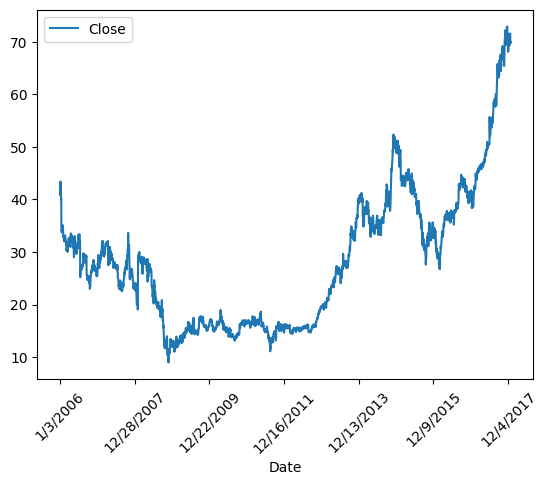

In [9]:
# Show the data visually
df.plot(x='Date',y='Close')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Create the model
model = RandomForestRegressor()

In [11]:
# Train the model
X = df[['Open','High','Low','Volume']]
X = X[:int(len(df)-1)]
y = df['Close']
y = y[:int(len(df)-1)]
model.fit(X,y) # Training the model

# I don't want last row so, len(df)-1, and I will cast it as an int
# "fit" is another term for training

RandomForestRegressor()

In [13]:
# Test the model
predictions = model.predict(X)
print("The model score is: ", model.score(X,y))

The model score is:  0.9999399075088967


In [14]:
# The best score is one, so this model did very well in training the dataset

In [15]:
# Make the predictions
new_data = df[['Open','High','Low','Volume']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row or day to be: ', prediction)
print('Actual value is:', df[['Close']].tail(1).values[0][0])

The model predicts the last row or day to be:  [69.8853]
Actual value is: 69.85


In [17]:
# reference - https://www.youtube.com/watch?v=RHeUqqrxP-w&list=PLBhJnyA0V0uKUX93csc8u3uVsYqISJnsv&index=46